In [ ]:
# ELIJAH MALABUYO DATA301-CALPOLY
import pandas as pd
import requests
import numpy as np

In [ ]:
seasons = ['2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13', '2011-12', '2010-11']
seasons_int = [2021-22, 2020-21, 2019-20, 2018-19, 2017-18, 2016-17, 2015-16, 2014-15, 2013-14, 2012-13, 2011-12, 2010-11]

In [ ]:
api = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2021-22&SeasonType=Regular%20Season&StatCategory=PTS"

In [ ]:
api_avg = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2021-22&SeasonType=Regular%20Season&StatCategory=PTS"

In [ ]:
def makeDf(i):
  url = f'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season={i}&SeasonType=Regular%20Season&StatCategory=PTS'
  response = requests.request("GET", url)
  response = response.json()
  column = response["resultSet"]["headers"]
  players = response['resultSet']['rowSet']
  df = pd.DataFrame(players, columns = column)
  return df

In [ ]:
def toDF(url):
  response = requests.request("GET", url)
  response = response.json()
  column = response["resultSet"]["headers"]
  players = response['resultSet']['rowSet']
  df = pd.DataFrame(players, columns = column)
  return df

In [ ]:
# keys: season # value : dataframe
player_data = {}
for i in range(len(seasons_int)):
  player_data[seasons[i]] = makeDf(seasons[i])

In [ ]:
df_avg = toDF(api_avg)
df_total = player_data['2021-22']

In [ ]:
whole_df = df_avg.merge(df_total, on="PLAYER_ID")
## COMBINE DATASET X ATTRIBUTES - AVERAGES
## Y ATTRIBUTES - TOTALS

In [ ]:
all_stars = ["Kevin Durant", "Joel Embiid", "Ja Morant", "Jayson Tatum", "Andrew Wiggins", "Trae Young", "LaMelo Ball", "Devin Booker", "Rudy Gobert", "Zach Lavine", "Khris Middleton", "Dejounte Murray", "Karl-Anthony Towns", "Draymond Green", "LeBron James","Giannis Antetokounmpo", "Stephen Curry", "DeMar DeRozan", "Nikola Jokic", "Jarrett Allen", "Jimmy Butler", "Luka Doncic", "Darius Garland", "James Harder", "Donovan Mitchell", "Chris Paul", "Fred VanVleet" ]

In [ ]:
## apply all star category
def checkALLSTAR(row):
  if row["PLAYER_x"] in all_stars:
    val = 1
  else:
    val = 0
  return val

In [ ]:
# CREATED CSV FILES SO THAT I DO NOT NEED TO REQUEST API
# player_data['2021-22'].to_csv(f'player_totals_2122.csv', index = False)

In [ ]:
X_train_FG_PCT = whole_df[['FG_PCT_x', 'MIN_y']]
X_train_FG3 = whole_df[["FG3_PCT_x", "MIN_y"]]
X_train_pts = whole_df[["PTS_x", "MIN_y"]]
X_train_ast = whole_df[["AST_x", "MIN_y"]]
X_train_reb = whole_df[["REB_x", "MIN_y"]]
off_labels = ['FG_PCT_x', "FG3_PCT_x", "PTS_x","AST_x","REB_x"]
offensive_stats_train = [X_train_FG_PCT, X_train_FG3, X_train_pts, X_train_ast, X_train_reb]

In [ ]:
whole_df[["PTS_x", "AST_x", "REB_x", "MIN_y"]].corr()

,PTS_x,AST_x,REB_x,MIN_y
PTS_x,1.000000,0.661280,0.445943,0.765269
AST_x,0.661280,1.000000,0.177784,0.556051
REB_x,0.445943,0.177784,1.000000,0.400256
MIN_y,0.765269,0.556051,0.400256,1.000000


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def standardKcluterPlot(train_data_lst, y_labels, Kmeans):
  for i in range(len(train_data_lst)):
    scaler = StandardScaler()
    scaler.fit(train_data_lst[i])
    standardize_train_data = scaler.transform(train_data_lst[i])
    model = Kmeans(n_clusters=3)
    model.fit(standardize_train_data)
    centroids = model.cluster_centers_
    clusters = model.labels_
    clusters = pd.Series(clusters).map({
      0: "r",
      1: "b",
      2: "g",
      3:"y",
      4:"c"
      })
    train_data_lst[i].plot.scatter(x="MIN_y", y=y_labels[i], 
                     c=clusters, marker="x", alpha=.5)
    

In [ ]:
# go through each stat and min 
# go through and see which type of player in each cluster 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

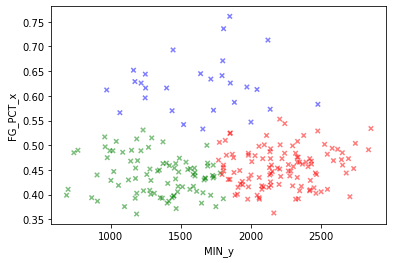

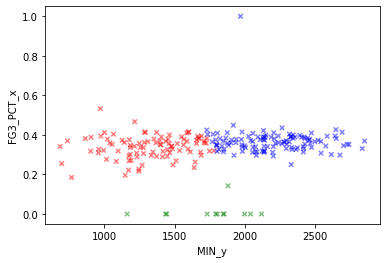

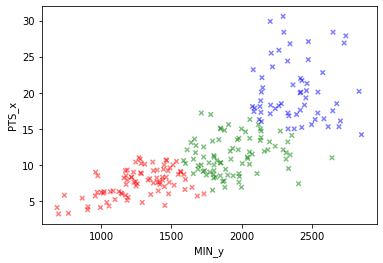

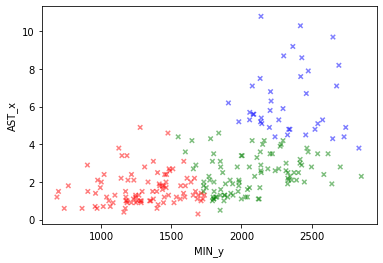

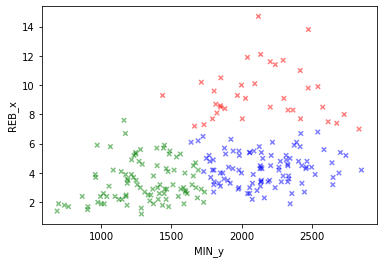

In [ ]:
standardKcluterPlot(offensive_stats_train,off_labels, KMeans)

In [ ]:
# Finding alternate all stars based of stats utilizing k means classfication

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
whole_df["ALLSTAR"] = whole_df.apply(checkALLSTAR, axis=1)

In [ ]:
training_x = whole_df[["PTS_x", "AST_x", "REB_x", "STL_x", "EFF_x", "BLK_x", "FG_PCT_x"]]
training_y = whole_df[["ALLSTAR"]]

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)
pipeline.fit(training_x, training_y)
# someone with these stats
pipeline.predict_proba([[20.1, 5, 3, 2, 10, 1, 0.4 ]])

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.8, 0.2]])

In [ ]:
all_star_df = whole_df[whole_df["ALLSTAR"] == 1]

In [ ]:
all_star_df
asdf_train = all_star_df[["PTS_x", "AST_x", "REB_x", "STL_x", "EFF_x", "BLK_x", "FG_PCT_x"]]
asdf_count = len(asdf_train.index)

In [ ]:
X_train_sc = (training_x - training_x.mean()) / training_x.std()

In [ ]:
import numpy as np

In [ ]:
for i in range(asdf_count):
  cur = asdf_train.iloc[i]
  x_new_sc = (cur - training_x.mean()) / training_x.std()
  dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
  dists_sorted = dists.sort_values()
  print(dists_sorted.index[:10])

Int64Index([0, 1, 10, 6, 5, 38, 14, 2, 36, 37], dtype='int64')
Int64Index([1, 0, 10, 5, 2, 14, 6, 28, 38, 37], dtype='int64')
Int64Index([2, 16, 14, 9, 6, 23, 3, 30, 19, 7], dtype='int64')
Int64Index([3, 17, 9, 4, 16, 2, 7, 13, 34, 30], dtype='int64')
Int64Index([4, 7, 11, 12, 6, 15, 13, 9, 25, 8], dtype='int64')
Int64Index([5, 1, 0, 2, 28, 10, 14, 19, 16, 6], dtype='int64')
Int64Index([6, 14, 7, 12, 4, 22, 9, 10, 24, 15], dtype='int64')
Int64Index([7, 4, 9, 15, 13, 12, 6, 8, 25, 11], dtype='int64')
Int64Index([8, 9, 13, 7, 27, 25, 15, 18, 21, 12], dtype='int64')
Int64Index([9, 7, 8, 13, 25, 15, 23, 27, 21, 4], dtype='int64')
Int64Index([10, 38, 36, 6, 22, 14, 0, 37, 1, 28], dtype='int64')
Int64Index([17, 34, 32, 13, 9, 79, 23, 25, 8, 3], dtype='int64')
Int64Index([19, 23, 68, 16, 32, 58, 21, 2, 9, 14], dtype='int64')
Int64Index([21, 23, 32, 58, 8, 18, 9, 27, 25, 89], dtype='int64')
Int64Index([23, 21, 32, 9, 58, 25, 19, 16, 30, 8], dtype='int64')
Int64Index([25, 15, 27, 13, 12, 40, 9,

In [ ]:
# print alternate allstar
print("Allstar: " + all_star_df["PLAYER_x"].loc[0] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[38])
print("Allstar: " + all_star_df["PLAYER_x"].loc[1] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[28])
print("Allstar: " + all_star_df["PLAYER_x"].loc[2] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[30])
print("Allstar: " + all_star_df["PLAYER_x"].loc[3] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[34])
print("Allstar: " + all_star_df["PLAYER_x"].loc[4] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[15])
print("Allstar: " + all_star_df["PLAYER_x"].loc[5] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[28])
print("Allstar: " + all_star_df["PLAYER_x"].loc[6] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[24])
print("Allstar: " + all_star_df["PLAYER_x"].loc[7] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[25])
print("Allstar: " + all_star_df["PLAYER_x"].loc[8] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[27])
print("Allstar: " + all_star_df["PLAYER_x"].loc[9] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[27])
print("Allstar: " + all_star_df["PLAYER_x"].loc[10] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[36])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[11] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[79])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[12] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[68])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[13] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[32])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[14] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[58])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[15] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[40])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[16] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[60])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[17] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[127])
print("Allstar: " + all_star_df["PLAYER_x"].iloc[18] + " REPLACEMENT: " + whole_df["PLAYER_x"].iloc[58])

Allstar: Joel Embiid REPLACEMENT: Nikola Vucevic
Allstar: Giannis Antetokounmpo REPLACEMENT: Domantas Sabonis
Allstar: Luka Doncic REPLACEMENT: Russell Westbrook
Allstar: Trae Young REPLACEMENT: D'Angelo Russell
Allstar: DeMar DeRozan REPLACEMENT: CJ McCollum
Allstar: Nikola Jokic REPLACEMENT: Domantas Sabonis
Allstar: Jayson Tatum REPLACEMENT: Julius Randle
Allstar: Devin Booker REPLACEMENT: Khris Middleton
Allstar: Donovan Mitchell REPLACEMENT: Terry Rozier
Allstar: Stephen Curry REPLACEMENT: Terry Rozier
Allstar: Karl-Anthony Towns REPLACEMENT: Christian Wood
Allstar: Darius Garland REPLACEMENT: Kyle Lowry
Allstar: Dejounte Murray REPLACEMENT: Chris Paul
Allstar: Fred VanVleet REPLACEMENT: Jrue Holiday
Allstar: LaMelo Ball REPLACEMENT: Tyrese Haliburton
Allstar: Khris Middleton REPLACEMENT: Cade Cunningham
Allstar: Andrew Wiggins REPLACEMENT: Franz Wagner
Allstar: Rudy Gobert REPLACEMENT: Robert Williams III
Allstar: Chris Paul REPLACEMENT: Tyrese Haliburton


In [ ]:
# get df of alternate allstars
alt_allstars_df = whole_df.iloc[[38, 28, 30, 34, 15, 28, 24, 25, 27, 36, 79, 68, 32, 58, 40, 60, 127, 58]]
alt_allstars_df

,PLAYER_ID,RANK_x,PLAYER_x,TEAM_ID_x,TEAM_x,GP_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,...,AST_y,STL_y,BLK_y,TOV_y,PF,PTS_y,EFF_y,AST_TOV,STL_TOV,ALLSTAR
38,202696,39,Nikola Vucevic,1610612741,CHI,73,33.1,7.5,15.8,0.473,...,236,70,71,136,181,1288,1696,1.74,0.52,0
28,1627734,29,Domantas Sabonis,1610612758,SAC,62,34.5,7.1,12.5,0.573,...,323,59,27,195,203,1171,1721,1.66,0.30,0
30,201566,31,Russell Westbrook,1610612747,LAL,78,34.3,7.0,15.8,0.444,...,550,75,20,295,235,1441,1553,1.86,0.25,0
34,1626156,35,D'Angelo Russell,1610612750,MIN,65,32.0,6.2,15.0,0.411,...,460,62,22,165,130,1176,1155,2.79,0.38,0
15,203468,16,CJ McCollum,1610612740,NOP,62,34.6,8.6,18.8,0.460,...,315,70,22,127,121,1370,1237,2.48,0.55,0
28,1627734,29,Domantas Sabonis,1610612758,SAC,62,34.5,7.1,12.5,0.573,...,323,59,27,195,203,1171,1721,1.66,0.30,0
24,203944,25,Julius Randle,1610612752,NYK,72,35.3,7.1,17.3,0.411,...,370,53,39,245,205,1447,1548,1.51,0.22,0
25,203114,26,Khris Middleton,1610612749,MIL,66,32.4,6.8,15.5,0.443,...,358,76,18,190,160,1325,1342,1.88,0.40,1
27,1626179,28,Terry Rozier,1610612766,CHA,73,33.7,7.1,16.0,0.444,...,326,93,25,96,119,1408,1396,3.40,0.97,0
36,1626174,37,Christian Wood,1610612745,HOU,68,30.8,6.5,12.9,0.501,...,155,54,65,126,171,1218,1489,1.23,0.43,0


In [ ]:
Y_train = whole_df["ALLSTAR"]
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X=training_x, y=training_y)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_train_ = model.predict(training_x)
accuracy = (y_train_ == Y_train).mean()
accuracy

0.9605263157894737

In [ ]:
true_positives = ((y_train_ == 0) & (Y_train == 0)).sum()

precision = true_positives / (y_train_ == 0).sum()
recall = true_positives / (training_y == 0).sum()
    
precision, recall

(0.9629629629629629, ALLSTAR    0.995215
 dtype: float64)

In [ ]:
from sklearn.metrics import f1_score

f1_score(Y_train == 0, y_train_ == 0)

0.9788235294117646